# Physical Models of Living Systems: Homework 1
Laura Schulze (2122311)


## Task 1
*1) Perform linear stability analysis of the deterministic logistic equation.*

**Logistic growth** of a population is described via the following differential equation
$$
    \frac{\mathrm{d}N}{\mathrm{d}t} \equiv \overset{\cdot}{N}= \mu N \left(1-\frac{N}{k}\right)
$$
Where $N(t)$ is the population at time $t$, $\mu$ is the growth rate and $k$ is the carrying capacity. This is solved by
$$
    N(t) = \frac{N(0)\exp{\left(\mu t\right)}}{1 + \frac{N(0)}{k}\left(\exp{\left(\mu t\right)}-1\right)} \ .
$$
First, we need to find the fixed points $N^*$, at which the first time derivative is 0, meaning the solution is stationary:
$$
    \frac{\mathrm{d}N}{\mathrm{d}t}\bigg\rvert_{N=N^*} = \mu N^* \left(1-\frac{N^*}{k}\right) = 0
$$
Assuming a nonzero growth rate there are 2 such stationary solutions: $N_1^*=0$ and $N_2^*=k$.

We now consider a small perturbation $\delta N = N(t) - N^*$ around the stationary point $N^*$ and make a linear approximation via Taylor expansion around $N^*$:
$$
\begin{align}
    \overset{\cdot}{N} &\approx \overset{\cdot}{N}\bigg\rvert_{N=N^*} + J \,\delta N  + \mathcal{O}(\delta N^2) \\
    &\approx J \, \delta N 
\end{align}
$$
where $J$ is the Jacobian of $\overset{\cdot}{N}$.
Computing the Jacobian $J$ (which is a scalar in this case) yields:
$$
    J = \frac{\partial \overset{\cdot}{N}}{\partial N} 
    = \frac{\partial}{\partial N} \left( \mu N \left(1-\frac{N}{k}\right) \right)
    = \mu \left( 1- \frac{2N}{k} \right) \ .
$$

Now the Jacobian is evalutated at the stationary points $N^*$.
For $N^*_1 = 0$, the Jacobian yields  $J = \mu >0  $, since the growth rate $\mu$ is assumed to be positive. This means that the equilibrium at $N^*_1 = 0$ is *unstable*.

For $N^*_2 = k$, the Jacobian yields $J= -\mu < 0$, indicating a *stable* equilibrium. 

## Task 2
*2) Perform the quasi stationary approximation of the consumer resource model with 1 species and 1 resources for the abiotic case (without Monod). Check the analytical result with simulations. If you add Monod, numerically how the solutions change?*

The **consumer resource model** describes the evolution of a population $N$ and available resources $R$ in time using the following equations:
$$
 \begin{cases}
    \frac{\mathrm{d}N}{\mathrm{d}t} = \left(\gamma g(R) - d\right) N(t) \\
    \frac{\mathrm{d}R}{\mathrm{d}t} =\mu(R) - g(R) N(t)    
\end{cases}
$$
where $N(t)$ is the population at time $t$, $R(t)$ is the amount of resources in the environment, $g(R)$ is the resource consuption per individuum, $\mu(R)$ is the resource growth function, $\gamma$ is the yield coefficient, and $d$ is the death rate. For simplicity, a linear resource consumption $g(R) = q R$ is used. In the **abiotic case**, the resource growth $\mu(R)$ is assumed to be constant: $\mu(R) = S = \mathrm{const.}$

The **quasi-stationary approximation** (QSA) assumes that the resource dynamics act at a much faster timescale than the population dynamics, therefore $R$ can be approximated as fixed at the equilibrium value found via
$$
    \frac{\mathrm{d}R}{\mathrm{d}t} = \mu(R) - g(R) N(t) \overset{!}{=} 0 \ .
$$
With abiotic resources and linear resource consumption, this becomes
$$
    \frac{\mathrm{d}R}{\mathrm{d}t} = S - q R N(t) \overset{!}{=} 0 \ ,
$$
which is solved by the following $R^*$:
$$
     R^* = \frac{S}{q N(t)} \ .
$$

Inserting this into the first differential equation, we obtain
$$
    \frac{\mathrm{d}N}{\mathrm{d}t} = \left(\gamma q R^* - d\right) N(t) 
    = \left(\frac{\gamma S}{N(t)} - d\right) N(t)
    = {\gamma S} - d  N(t)    
$$
The solution to this differential equation is
$$
    N(t) = \left( \frac{\gamma S}{d} \exp{\left(dt\right)} +N(0) - \frac{\gamma S}{d} \right) \exp{\left(-d t \right)}
$$

### Monod equation for resource consumption
Instead of resource consumption growing linearly without limitations, it can also be modelled via the **Monod equation**:
$$
    g(R) = \frac{R}{1+\frac{R}{\alpha}} = \frac{1}{\frac{1}{R}+\frac{1}{\alpha}}
$$
with $\alpha$ being a resource-specific constant.
In that case, applying the QSA yields 
$$
    \frac{\mathrm{d}R}{\mathrm{d}t} = S - \frac{R}{1+\frac{R}{\alpha}} N(t) \overset{!}{=} 0 \ ,
$$
which is solved by the following $R^*$:
$$
    R^* = \frac{1}{\frac{N(t)}{S} - \frac{1}{\alpha}} = \frac{S \alpha}{N(t)\alpha - S}
 \ .
$$

Inserting this back into the Monod equation, we obtain
$$
 g(R^*) = \frac{1}{\frac{1}{R^*}+\frac{1}{\alpha}}
  = \frac{1}{\frac{N(t)}{S} - \frac{1}{\alpha}+\frac{1}{\alpha}}
  = \frac{S}{N(t)}
$$

Inserting this into the first differential equation, we obtain
$$
    \frac{\mathrm{d}N}{\mathrm{d}t} = \left(\gamma g(R^*) - d\right) N(t) 
    =\left(\frac{\gamma S}{N(t)} - d\right) N(t) 
    = \gamma S - d N(t) 
$$
This is the same differential equation that we obtained for the linear resource consumption, thus the solution for $N(t)$ is the same in both cases.

### Numerical Simulations
In the following, the CRM with abiotic resources and linear resource consumption as well as Monod resource consumption is simulated numerically via Euler method and compared to the analytical QSA solution:

In [1]:
# library imports
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# define model parameters
# change to explore different constellations
T = int(1e6) # number of time steps 
dt = 0.0001 # step size
N_init = 5 # initial population N(0)
R_init = 10 # initial amount of resources 
gamma = 1 # yield coefficient
d = 0.1 # death rate
S = 10 # abiotic resource growth constant
alpha = 10 # Monod uptake const.
q = 0.01 # linear uptake coefficient

In [3]:
# define analytical function for abiotic cmr with qsa approximation
def cmr_analytical(t, N_init, gamma, d, S):
    n_t = (gamma*S/d * np.exp(d*t) + N_init - gamma*S/d)*np.exp(-d*t)
    return n_t

In [4]:
# Numerical solution of the differential equations via Euler method
# initialise lists
N_qsa = [N_init]  # population for CMR with QSA approx.
N_linear = [N_init]  # population for CMR with linear uptake
N_monod = [N_init]  # population for CMR with Monod uptake
R_linear = [R_init]  # Resources for CMR with linear uptake
R_monod = [R_init]  # Resources for CMR with Monod uptake
# Euler method
for t in range(T):
    # CMR with QSA approximation
    N_qsa.append(N_qsa[t] + dt* (gamma*S - d* N_qsa[t]))  # update population
    # CMR with linear uptake
    R_linear.append(R_linear[t] + dt*(S - q*R_linear[t]*N_linear[t]))  # update resources
    N_linear.append(N_linear[t] + dt*((gamma*q*R_linear[t] -d)*N_linear[t]))  # update population
    # CMR with monod uptake
    R_monod.append(R_monod[t] + dt*(S - R_monod[t]/(1+R_monod[t]/alpha)*N_monod[t]))  # update resources
    N_monod.append(N_monod[t] + dt*((gamma*R_monod[t]/(1+R_monod[t]/alpha) -d)*N_monod[t]))  # update population

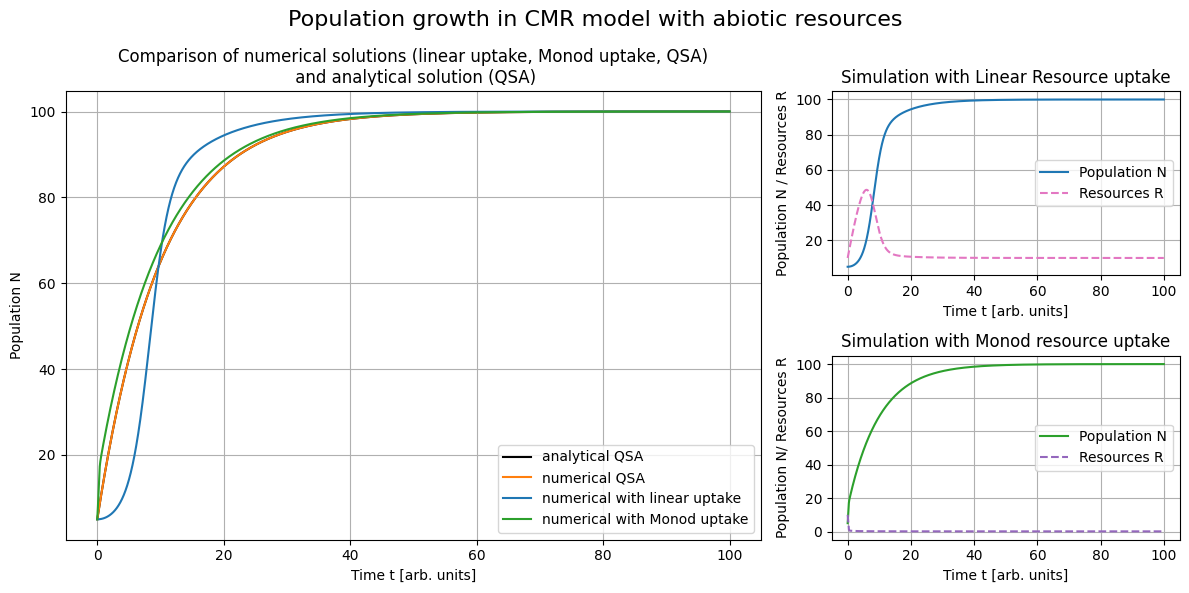

In [5]:
# generate time array for plotting
t = np.arange(T+1)*dt
# compute analytical values
N_analytical = cmr_analytical(t, N_init, gamma, d, S)
# plot results
fig = plt.figure(figsize=(12, 6), tight_layout=True)
gs = fig.add_gridspec(2,2, width_ratios=[2,1])
ax0 = fig.add_subplot(gs[:,0])
ax1 = fig.add_subplot(gs[0,1])
ax2 = fig.add_subplot(gs[1,1])
ax0.plot(t, N_analytical, label="analytical QSA", color='black', zorder=-1)
ax0.plot(t, N_qsa, label="numerical QSA", color='tab:orange')
ax0.plot(t, N_linear, label="numerical with linear uptake", color='tab:blue')
ax0.plot(t, N_monod, label="numerical with Monod uptake", color='tab:green')
#ax0.plot(t, R_linear, label="Resource linear")
#ax0.plot(t, R_monod, label="Resource Monod")
ax0.set_xlabel("Time t [arb. units]")
ax0.set_ylabel("Population N")
ax0.grid()
ax0.legend()
ax0.set_title("Comparison of numerical solutions (linear uptake, Monod uptake, QSA)\n and analytical solution (QSA)")

ax1.plot(t, N_linear, label="Population N", color="tab:blue")
ax1.plot(t, R_linear, label="Resources R", color="tab:pink", ls="--")
ax1.set_xlabel("Time t [arb. units]")
ax1.set_ylabel("Population N / Resources R")
ax1.grid()
ax1.legend()
ax1.set_title("Simulation with Linear Resource uptake")

ax2.plot(t, N_monod, label="Population N", color="tab:green")
ax2.plot(t, R_monod, label="Resources R", color="tab:purple", ls="--")
ax2.set_xlabel("Time t [arb. units]")
ax2.set_ylabel("Population N/ Resources R")
ax2.grid()
ax2.legend()
ax2.set_title("Simulation with Monod resource uptake")

fig.suptitle("Population growth in CMR model with abiotic resources", size=16)
plt.show()

The numerical solutions appear to converge to the value we expected based on the analytical considerations. Notably, while linear and Monod resource uptake differ initially, they eventually converge to the same stable population level, which is consistent with the analytical observation that both yield the same differential equation for $N$ in the quasi-stationary approximation.